In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import xgboost as xgb
%matplotlib inline


df = pd.read_csv('train_data.csv', sep=',')

# df.head(50)

In [7]:
df = pd.read_csv('train_data.csv', sep=',')

In [61]:
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.height', 200)

In [55]:
df[df['Анамнез заболевания']!=''][df['Пол']==1][25:200]

C:\Users\ayuts\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit
127,127,M76.5,Тендинит области надколенника,59,1,,,"Отек верхнего века заметила сегодня с утра, вчера появился зуд верхнего века. В глаза медикаменты не закапывала. Данные жалобы впервые. Носит МКЛ - 2,0D",,0
130,130,K82.9,Болезнь желчного пузыря неуточненная,42,1,,,"начало заболевания ни с чем не связывает, самостоятельно не лечился, обращался к дерматологу по м/ж, назначен крем Акридерм ГК с временным положительным эффектом, успокоительные настои, после чего...",,1
134,134,G45.0,Синдром вертебробазилярной артериальной системы,27,1,,,Вышеописанные жалобы беспокоят около 6 дней. Без явных причин. Интенсивность боль меняется в течение дня. максимально до 5-6 баллов по ВАШ. Принимал нурофен без эффекта АД и температуру не измеря...,,0
142,142,J30.3,Другие аллергические риниты,9,1,,,"Жалобы беспокоят в течении месяца 09.2015г. Пациентка состоит на учете невропатолога на Кипре (беспокоят частые панические атаки, чувство страха ""смерти"").",,0
151,151,M41,Сколиоз,24,1,,,"начало заболевания связывает с применением нового крема для лица (?), самостоятельно принимала Супрастин с временным положительным эффектом, 26.09 и 29.09 отмечала эпизоды появления высыпания с от...",,0
155,155,K30,Диспепсия,36,1,,,"провела назначенное лечение в полном объеме,явилась на контроль",,1
160,160,Z01.8,Другое уточненное специальное обследование,37,1,,,13.07.17 оперирована - микрохирургич. удаление экстрамедуллярной опухоли на уровне Т3 позвонка слева. Обследована МРТ грудного отдела позвоночника. Ранний полеоперационный период. Принимает кето...,,1
161,161,M15.8,Другой полиартроз,52,1,,,без дополнений.,,1
163,163,M79.1,Миалгия,18,1,,,"Ухудшение состояния третий день, на фоне охлаждения появились вышеизложенные жалобы . Самостоятельно ставила компресс с мазью Вишневского , принимала лимфомиозот, без эффекта. Обратилась на прием...",,1
168,168,K04.0,Пульпит,21,1,,,Вышеописанные жалобы беспокоят несколько месяцев. Весной-зимой активно занималась фитнесом. Обследуется у гастроэнтеролога по поводу проблем со стулом. Предложено обратиться к кардиологу по пово...,удовлетворительное.,1


In [63]:
# df[[df['ID'] in [16,23,31,40,101,743]]]
df[['Код_диагноза', 'Диагноз', 'Возраст', 'Пол', 'Анамнез заболевания', 'Revisit']].loc[[16,23,31,40,101,743]].head(10)

,Код_диагноза,Диагноз,Возраст,Пол,Анамнез заболевания,Revisit
16,M42.1,Остеохондроз позвоночника у взрослых,33,2,"болен 3й день, полоскал горло хлоргекседином, без достаточного эффекта",1
23,M51.1,Поражения межпозвоночных дисков поясничного и других отделов с радикулопатией,39,2,Растет и развивается по возрасту.,0
31,N48.1,Баланопостит,58,1,Наблюдение за пролонгированием беременности,1
40,Z32.1,Беременность подтвержденная,46,2,считает себя больным около 5 дней.,1
101,K60.0,Острая трещина заднего прохода,41,2,"С 27.09 получает лечение по поводу ОРВИ. Отмечает улучшение самочувствия, кашельменьше.",1
743,L21,Себорейный дерматит,32,1,Осмотр после родов,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283086 entries, 0 to 283085
Data columns (total 10 columns):
ID                     283086 non-null int64
Код_диагноза           283086 non-null object
Диагноз                283086 non-null object
Возраст                283086 non-null int64
Пол                    283086 non-null int64
Общее состояние        41696 non-null object
аллергия               40908 non-null object
Анамнез заболевания    203656 non-null object
Внешний осмотр         13295 non-null object
Revisit                283086 non-null int64
dtypes: int64(4), object(6)
memory usage: 21.6+ MB


In [11]:
df.describe()

,ID,Возраст,Пол,Revisit
count,283086.000000,283086.000000,283086.000000,283086.000000
mean,141542.500000,41.696905,1.708347,0.828639
std,81720.033489,21.540704,0.454524,0.376825
min,0.000000,1.000000,1.000000,0.000000
25%,70771.250000,31.000000,1.000000,1.000000
50%,141542.500000,38.000000,2.000000,1.000000
75%,212313.750000,51.000000,2.000000,1.000000
max,283085.000000,2017.000000,2.000000,1.000000


In [14]:
df = df.fillna('')
anamn = df['Анамнез заболевания']
kod_diag = df['Код_диагноза']
diag = df['Диагноз']
gen_st = df['Общее состояние']
allerg = df['аллергия']
outs_st = df['Внешний осмотр']
y = df['Revisit']

In [3]:
df.head()

,Unnamed: 0,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit,lemm,text,past,pres,futr,male,female
0,0,0,J06.0,Острый ларингофарингит,29,2,NaN,NaN,NaN,На жевательной поверхности 2.6- кариозная поло...,1,NaN,NaN,0,0,0,0,0
1,1,1,N76.1,Подострый и хронический вагинит,45,2,NaN,NaN,считает себя больной на протяжении многих лет....,NaN,1,считать себя больной на протяжение многий год ...,считает себя больной на протяжении многих лет ...,2,4,0,0,2
2,2,2,L23.9,"Аллергический контактный дерматит, причина не ...",63,2,NaN,NaN,"Болен около 2-х дней, когда появились описанны...",NaN,1,больной около х день когда появиться описать ж...,болен около х дней когда появились описанные ж...,3,0,0,2,0
3,3,3,N48.1,Баланопостит,43,2,NaN,не отягощен,NaN,NaN,1,NaN,NaN,0,0,0,0,0
4,4,4,Z00.0,Общий медицинский осмотр,29,1,NaN,NaN,провела полное обследование для оперативного л...,NaN,1,провести полный обследование для оперативный л...,провела полное обследование для оперативного л...,1,0,0,0,1


In [5]:
df.columns

Index(['ID', 'Код_диагноза', 'Диагноз', 'Возраст', 'Пол', 'Общее состояние',
       'аллергия', 'Анамнез заболевания', 'Внешний осмотр', 'Revisit'],
      dtype='object')

In [6]:
X = df[[ 'Код_диагноза', 
        'Диагноз', 
        'Возраст', 'Пол', 'Общее состояние',
       'аллергия', 
#         'Анамнез заболевания', 
        'Внешний осмотр']]

In [7]:
df.head(5)

,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit
0,0,J06.0,Острый ларингофарингит,29,2,NaN,NaN,NaN,На жевательной поверхности 2.6- кариозная поло...,1
1,1,N76.1,Подострый и хронический вагинит,45,2,NaN,NaN,считает себя больной на протяжении многих лет....,NaN,1
2,2,L23.9,"Аллергический контактный дерматит, причина не ...",63,2,NaN,NaN,"Болен около 2-х дней, когда появились описанны...",NaN,1
3,3,N48.1,Баланопостит,43,2,NaN,не отягощен,NaN,NaN,1
4,4,Z00.0,Общий медицинский осмотр,29,1,NaN,NaN,провела полное обследование для оперативного л...,NaN,1


In [8]:
# anamn, kod_diag, diag, gen_st, allerg, outs_st

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = anamn.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
D1 = vectorizer.fit(corpus)
print(len(D1.vocabulary_))

corpus = kod_diag.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
print(corpus)
D2 = vectorizer.fit(corpus)
print(len(D2.vocabulary_))

corpus = diag.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
D3 = vectorizer.fit(corpus)
print(len(D3.vocabulary_))

corpus = gen_st.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
D4 = vectorizer.fit(corpus)
print(len(D4.vocabulary_))

corpus = allerg.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
D5 = vectorizer.fit(corpus)
print(len(D5.vocabulary_))

corpus = outs_st.values
vectorizer = CountVectorizer(min_df = 3, token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
D6 = vectorizer.fit(corpus)
print(len(D6.vocabulary_))

# dict = vectorizer.get_feature_names()
# len(dict)

30759
['J06.0' 'N76.1' 'L23.9' ... 'H16' 'J00' 'N11']
23
2446
923
1297
524


In [9]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# corpus = anamn.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D1 = vectorizer.fit(corpus)
# anamn = D1.transform(anamn)

# corpus = kod_diag.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D2 = vectorizer.fit(corpus)
# kod_diag = D2.transform(kod_diag)

# corpus = diag.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D3 = vectorizer.fit(corpus)
# diag = D3.transform(diag)

# corpus = gen_st.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D4 = vectorizer.fit(corpus)
# gen_st = D4.transform(gen_st)

# corpus = allerg.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D5 = vectorizer.fit(corpus)
# allerg = D5.transform(allerg)

# corpus = outs_st.values
# vectorizer = TfidfVectorizer(min_df = 5/len(X), token_pattern = '[0-9]*[а-яА-ЯёЁa-zA-Z]+')
# print(corpus)
# D6 = vectorizer.fit(corpus)
# outs_st = D6.transform(outs_st)

# dict = vectorizer.get_feature_names()
# len(dict)

In [10]:
X['Код_диагноза'] = kod_diag
# X['Анамнез заболевания'] = anamn
X['Диагноз'] = diag
X['Общее состояние'] = gen_st
X['аллергия'] = allerg
X['Внешний осмотр'] = outs_st

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [11]:
X.head()

,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Внешний осмотр
0,"(0, 9)\t1\n (1, 13)\t1\n (2, 11)\t1\n (3,...","(0, 794)\t1\n (0, 1194)\t1\n (1, 179)\t1\n...",29,2,"(0, 41)\t1\n (1, 41)\t1\n (2, 41)\t1\n (3...","(0, 1)\t1\n (1, 1)\t1\n (2, 1)\t1\n (3, 4...","(0, 6)\t2\n (0, 11)\t1\n (0, 33)\t1\n (0,..."
1,"(0, 9)\t1\n (1, 13)\t1\n (2, 11)\t1\n (3,...","(0, 794)\t1\n (0, 1194)\t1\n (1, 179)\t1\n...",45,2,"(0, 41)\t1\n (1, 41)\t1\n (2, 41)\t1\n (3...","(0, 1)\t1\n (1, 1)\t1\n (2, 1)\t1\n (3, 4...","(0, 6)\t2\n (0, 11)\t1\n (0, 33)\t1\n (0,..."
2,"(0, 9)\t1\n (1, 13)\t1\n (2, 11)\t1\n (3,...","(0, 794)\t1\n (0, 1194)\t1\n (1, 179)\t1\n...",63,2,"(0, 41)\t1\n (1, 41)\t1\n (2, 41)\t1\n (3...","(0, 1)\t1\n (1, 1)\t1\n (2, 1)\t1\n (3, 4...","(0, 6)\t2\n (0, 11)\t1\n (0, 33)\t1\n (0,..."
3,"(0, 9)\t1\n (1, 13)\t1\n (2, 11)\t1\n (3,...","(0, 794)\t1\n (0, 1194)\t1\n (1, 179)\t1\n...",43,2,"(0, 41)\t1\n (1, 41)\t1\n (2, 41)\t1\n (3...","(0, 1)\t1\n (1, 1)\t1\n (2, 1)\t1\n (3, 4...","(0, 6)\t2\n (0, 11)\t1\n (0, 33)\t1\n (0,..."
4,"(0, 9)\t1\n (1, 13)\t1\n (2, 11)\t1\n (3,...","(0, 794)\t1\n (0, 1194)\t1\n (1, 179)\t1\n...",29,1,"(0, 41)\t1\n (1, 41)\t1\n (2, 41)\t1\n (3...","(0, 1)\t1\n (1, 1)\t1\n (2, 1)\t1\n (3, 4...","(0, 6)\t2\n (0, 11)\t1\n (0, 33)\t1\n (0,..."


In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [12]:
# anamn, kod_diag, diag, gen_st, allerg, outs_st
from sklearn.ensemble import RandomForestClassifier as rf_cl

# clf1 = rf_cl(max_depth=5, random_state=0).fit(anamn, y)
# X['Анамнез заболевания'] = clf1.predict_proba(anamn)

clf2 = rf_cl(max_depth=5, random_state=0).fit(kod_diag, y)
X['Код_диагноза'] = clf2.predict_proba(kod_diag)

clf3 = rf_cl(max_depth=5, random_state=0).fit(diag, y)
X['Диагноз'] = clf3.predict_proba(diag)

clf4 = rf_cl(max_depth=2, random_state=0).fit(gen_st, y)
X['Общее состояние'] = clf4.predict_proba(gen_st)

clf5 = rf_cl(max_depth=2, random_state=0).fit(allerg, y)
X['аллергия'] = clf5.predict_proba(allerg)

clf6 = rf_cl(max_depth=2, random_state=0).fit(outs_st, y)
X['Внешний осмотр'] = clf6.predict_proba(outs_st)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [13]:

# df['Анамнез заболевания'] = X['Анамнез заболевания']

df['Код_диагноза'] = X['Код_диагноза']
df['Диагноз'] = X['Диагноз']
df['Общее состояние'] = X['Общее состояние']

df['аллергия'] = X['аллергия']
df['Внешний осмотр'] = X['Внешний осмотр']

In [15]:
df.head(5)

,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр,Revisit
0,0,0.166460,0.172318,29,2,0.17999,0.178196,NaN,0.080217,1
1,1,0.100408,0.172318,45,2,0.17999,0.178196,считает себя больной на протяжении многих лет....,0.174106,1
2,2,0.176894,0.172318,63,2,0.17999,0.178196,"Болен около 2-х дней, когда появились описанны...",0.174106,1
3,3,0.100408,0.172318,43,2,0.17999,0.113589,NaN,0.174106,1
4,4,0.181728,0.172318,29,1,0.17999,0.178196,провела полное обследование для оперативного л...,0.174106,1


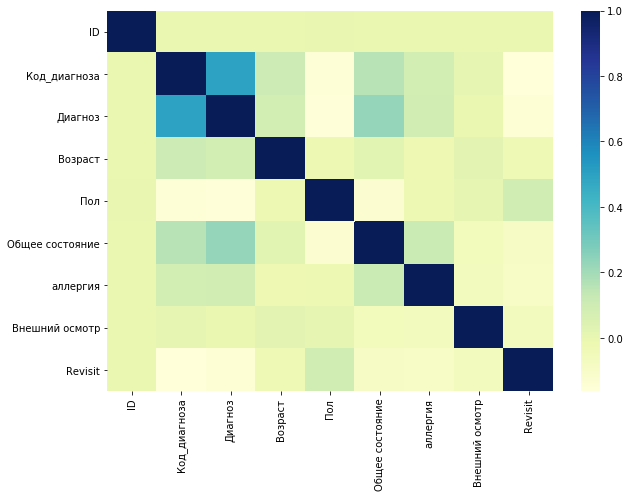

In [16]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [14]:
gbm = xgb.XGBClassifier(
    base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.02, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=650, n_jobs=-1,
       objective='binary:logistic', reg_alpha=0.03, reg_lambda=0.9,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.7)\
.fit(X, y)

In [15]:
xgb_matrix = xgb.DMatrix(X, y)
xgb_param = gbm.get_xgb_params()
cvresult = xgb.cv(
    xgb_param,
    xgb_matrix,
    num_boost_round=xgb_param['n_estimators'],
    nfold=5,
    verbose_eval=20,
    early_stopping_rounds=50,
    metrics='auc'
);

[0]	train-auc:0.687241+0.00203705	test-auc:0.685034+0.00289063
[20]	train-auc:0.70203+0.000408685	test-auc:0.699941+0.00202547
[40]	train-auc:0.70451+0.000365804	test-auc:0.702216+0.00157048
[60]	train-auc:0.705674+0.000460013	test-auc:0.703123+0.00158209
[80]	train-auc:0.70752+0.000576548	test-auc:0.704823+0.00160914
[100]	train-auc:0.708966+0.000519481	test-auc:0.706096+0.00154081
[120]	train-auc:0.710141+0.000571586	test-auc:0.707006+0.00148785
[140]	train-auc:0.711096+0.000527921	test-auc:0.707707+0.00143953
[160]	train-auc:0.711835+0.000548569	test-auc:0.708217+0.00141663
[180]	train-auc:0.712569+0.00054943	test-auc:0.708689+0.00140989
[200]	train-auc:0.713238+0.000499369	test-auc:0.709111+0.00141327
[220]	train-auc:0.713888+0.000494214	test-auc:0.709467+0.00139806
[240]	train-auc:0.714554+0.000476224	test-auc:0.709847+0.00144081
[260]	train-auc:0.715175+0.000482966	test-auc:0.710119+0.00145678
[280]	train-auc:0.715694+0.000479839	test-auc:0.710361+0.00143379
[300]	train-auc:0.716

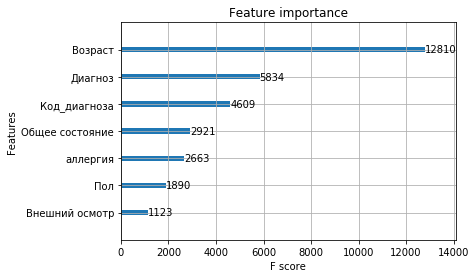

In [20]:
xgb.plot_importance(gbm)

In [16]:
predictions = gbm.predict_proba(X)
predictions_filtered = [x[1] for x in predictions]

In [17]:
np.savetxt("train_pred_1.csv", predictions_filtered, delimiter="\n")

In [21]:
x_test = pd.read_csv('test_data.csv', sep=',')
x_test.head()

,ID,Код_диагноза,Диагноз,Возраст,Пол,Общее состояние,аллергия,Анамнез заболевания,Внешний осмотр
0,0,Z39.2,Рутинное послеродовое наблюдение,41,2,Общее самочувствие удовлетворительное. Кожные ...,Аллергию на лекарства - отрицает.,NaN,NaN
1,1,M54.2,Цервикалгия,64,2,NaN,не отягощен,NaN,NaN
2,2,M41,Сколиоз,34,2,"Удовлетворительное. Температура тела - 36,6. С...",NaN,NaN,NaN
3,3,J31.2,Хронический фарингит,58,2,NaN,NaN,NaN,Общее состояние удовлетворительное. Конфигурац...
4,4,M21.4,Плоская стопа [pes planus] (приобретенная),34,2,NaN,NaN,Жалобы сегодня с утра,NaN


In [22]:
x_test = x_test[['Код_диагноза', 
                 'Диагноз', 
                 'Возраст', 'Пол', 'Общее состояние',
       'аллергия', 
#                  'Анамнез заболевания', 
                 'Внешний осмотр']]
x_test = x_test.fillna('NaN')
kod_diag_t = D2.transform(x_test['Код_диагноза'])
# anamn_t = D1.transform(x_test['Анамнез заболевания'])
diag_t = D3.transform(x_test['Диагноз'])
gen_st_t = D4.transform(x_test['Общее состояние'])
allerg_t = D5.transform(x_test['аллергия'])
outs_st_t = D6.transform(x_test['Внешний осмотр'])

In [23]:

# x_test['Анамнез заболевания'] = clf1.predict_proba(anamn_t)
x_test['Код_диагноза'] = clf2.predict_proba(kod_diag_t)
x_test['Диагноз'] = clf3.predict_proba(diag_t)
x_test['Общее состояние'] = clf4.predict_proba(gen_st_t)
x_test['аллергия'] = clf5.predict_proba(allerg_t)
x_test['Внешний осмотр'] = clf6.predict_proba(outs_st_t)

In [24]:
predictions = gbm.predict_proba(x_test)
predictions_filtered = [x[1] for x in predictions]

In [ ]:
predictions_filtered

In [25]:
np.savetxt("submission.csv", predictions_filtered, delimiter="\n")

In [26]:
ID = pd.read_csv('test_data.csv', sep=',')
ur = ID['ID']

In [27]:
ur.head()

0    0
1    1
2    2
3    3
4    4
Name: ID, dtype: int64

In [28]:
sub = pd.read_csv('submission.csv')
sub['ID'] = ur
sub = sub[['ID','proba']]
sub.head()

,ID,proba
0,0,0.925888
1,1,0.895167
2,2,0.768352
3,3,0.967892
4,4,0.692713


In [29]:
sub.to_csv("submission_cv_a_03_l_9_bezanam.csv",sep=',', header=True, index=False)